szukanie zależności pomiędzy badanymi wartościami wśród pacjentów po przeszczepie serca 
obliczanie parametrów analizy statystycznej i tworzenie histogramów dla wybranych kolumn
generowanie skoroszytu korelacji pomiędzy wybranymi parametrami
drukowanie wykresów regresji wielomianowej (do 10 stopnia wielomianu) dla parametrów, których korelacja jest mniejsza niż -0.5 lub większa niż 0.5

In [2]:
import pandas as pd
import os
import openpyxl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
folder_path = 'C:\\Users\\jmmbo\\Downloads\\pacjenci'
pacjenci = []

if os.path.isdir(folder_path):
    print("Przeszukiwanie folderu:", folder_path)
    znalezione_pliki = False
    for plik in os.listdir(folder_path):
        if plik.endswith('.xlsx') and not plik.startswith('~$'):
            znalezione_pliki = True
            pacjenci.append(plik)


rows = ['Pole pow. l. przeds.', 'LAESV (A-L BIP)', 'LAESV (MOD BIP)', 
      'LVCO (4D Auto LVQ)', 'LVEF (Teich)', 'LVEF (4D Auto LVQ)',
      'GLPS (4D Auto LVQ)','LVIDd','LVIDs', 'IVSd', 'Masa LVd (4D Auto LVQ)',
      'LVPWd', 'LVSV (Teich)', 'LVSV (4D Auto LVQ)', 'LVCO (MOD BIP)',
      'LVEF (Auto EF BIP)', 'LVSV (Auto EF BIP)', 'LVEDV (Auto EF BIP)',
      'LVESV (Auto EF BIP)', 'RAA (s)', 'TAPSE']

combined_data = pd.DataFrame()

for pacjent in pacjenci:
    file_path = os.path.join(folder_path, pacjent)
    file = pd.read_excel(file_path)
    for value in rows:
        filter = file["Krótka etykieta"] == value
        filtered_data = file[filter]
        filtered_data.insert(0, 'nazwa pacjenta', pacjent)
        selected_columns = ['nazwa pacjenta', 'Krótka etykieta', 'Zapisana wartość']
        filtered_data = filtered_data[selected_columns]
        combined_data = pd.concat([combined_data, filtered_data])

pivot_data = combined_data.pivot_table(index='nazwa pacjenta', columns='Krótka etykieta', values='Zapisana wartość', aggfunc='first')

Przeszukiwanie folderu: C:\Users\jmmbo\Downloads\pacjenci


In [4]:
output_file = os.path.join(folder_path, 'output', 'wybrane_dane_pacjentów.xlsx')
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    pivot_data.to_excel(writer, index=True, sheet_name='out')

In [5]:
import numpy as np
pd.options.mode.chained_assignment = None

df = pd.read_excel(output_file)
for index, pacjent in enumerate(pacjenci):
    for row in rows:
        df[row][index] = float(str(df[row][index]).split(' ')[0])

In [6]:
def licz_srednia(lista):
    suma = 0
    liczba_el = 0
    for element in lista:
        if element != np.nan:
            suma += element
            liczba_el += 1
    return suma/liczba_el

bez_odstajacych = []

for value in rows:
    values = df[f'{value}'].dropna().tolist()
    srednia = licz_srednia(values)
    odchylenie = np.std(values)
    print(f'poprzednia ilość {len(values)}')
    print(f'srednia dla {value} wynosi {srednia}, a odchylenie standardowe wynosi {odchylenie}')
    for wartosc in values:
        if wartosc < (srednia - 2*odchylenie) or wartosc > (srednia + 2*odchylenie):
            values.remove(wartosc)
    print(f'obecna ilość {len(values)}')
    if len(values) < 20:
        del values
    else:
        bez_odstajacych.append(value)

print(f'ilość wszystkich wybranych kolumn {len(rows)}, ilość kolumn spełniających warunek minimalnej ilości wartości: {len(bez_odstajacych)}')

poprzednia ilość 29
srednia dla Pole pow. l. przeds. wynosi 25.1688642581342, a odchylenie standardowe wynosi 6.827042615515194
obecna ilość 26
poprzednia ilość 36
srednia dla LAESV (A-L BIP) wynosi 92.78757090867518, a odchylenie standardowe wynosi 45.690375456650855
obecna ilość 34
poprzednia ilość 36
srednia dla LAESV (MOD BIP) wynosi 83.02721694913917, a odchylenie standardowe wynosi 36.02805284414719
obecna ilość 34
poprzednia ilość 16
srednia dla LVCO (4D Auto LVQ) wynosi 5.899897538387293, a odchylenie standardowe wynosi 1.6620478233526716
obecna ilość 15
poprzednia ilość 36
srednia dla LVEF (Teich) wynosi 62.26490083046201, a odchylenie standardowe wynosi 10.534506265172878
obecna ilość 35
poprzednia ilość 16
srednia dla LVEF (4D Auto LVQ) wynosi 54.67159396628466, a odchylenie standardowe wynosi 7.4140465774582704
obecna ilość 15
poprzednia ilość 4
srednia dla GLPS (4D Auto LVQ) wynosi -14.78723231703043, a odchylenie standardowe wynosi 4.335261502409303
obecna ilość 4
poprzed

In [7]:
df['Pole pow. l. przeds.'].mean()+2*df['Pole pow. l. przeds.'].std()

39.06463347730794

In [8]:
df2 = df
df2
df2 = df2.where(df2.iloc[:,1:] < df2.iloc[:,1:].mean()+2*df2.iloc[:,1:].std())
df2 = df2.where(df2.iloc[:,1:].mean()-2*df2.iloc[:,1:].std() < df2.iloc[:,1:])
df2

C:\Users\jmmbo\AppData\Roaming\Python\Python311\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
C:\Users\jmmbo\AppData\Roaming\Python\Python311\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,nazwa pacjenta,GLPS (4D Auto LVQ),IVSd,LAESV (A-L BIP),LAESV (MOD BIP),LVCO (4D Auto LVQ),LVCO (MOD BIP),LVEDV (Auto EF BIP),LVEF (4D Auto LVQ),LVEF (Auto EF BIP),...,LVIDd,LVIDs,LVPWd,LVSV (4D Auto LVQ),LVSV (Auto EF BIP),LVSV (Teich),Masa LVd (4D Auto LVQ),Pole pow. l. przeds.,RAA (s),TAPSE
0,NaN,-13.316242,0.820337,48.012516,44.913516,4.456711,4.131842,94.433899,49.079437,46.974083,...,4.210358,2.623529,0.968417,50.382445,44.359459,53.874855,117.687462,18.765409,14.988046,1.68
1,NaN,NaN,0.908217,62.94594,60.401573,4.388175,4.330988,104.335915,59.632423,59.624493,...,4.931843,2.806366,0.781091,62.041941,62.209763,84.81185,NaN,26.148517,18.163537,1.836522
2,NaN,NaN,NaN,73.051742,67.844143,4.604216,4.295102,100.50013,59.092837,58.864735,...,4.513216,3.120894,0.976275,60.490877,59.159138,54.543016,NaN,21.371938,19.186148,NaN
3,NaN,NaN,1.271071,75.167018,70.979147,NaN,4.236117,113.249123,NaN,56.433899,...,4.845587,2.904829,1.106639,NaN,63.910892,77.573079,NaN,NaN,NaN,1.893913
4,NaN,NaN,0.94,78.46,74.39,4.79,3.34,81.68,53.9,50.2,...,4.83,3.25,0.78,57.53,41.0,66.57,NaN,26.59,18.04,1.88
5,NaN,NaN,1.01,97.46,93.64,4.28,4.52,96.74,58.52,59.42,...,4.84,3.24,0.91,52.32,57.48,67.38,NaN,28.46,NaN,1.69
6,NaN,NaN,1.109307,98.872708,94.060183,NaN,NaN,NaN,49.472799,NaN,...,5.537552,3.594514,1.082329,94.440882,NaN,95.516187,NaN,NaN,NaN,1.690435
7,NaN,NaN,1.082329,89.838876,85.129573,5.97721,5.761123,116.796547,59.99338,60.254398,...,5.009082,2.918536,0.718245,73.056546,70.375061,86.023906,NaN,27.409278,18.169197,1.94087
8,NaN,NaN,1.027461,95.665425,91.162969,NaN,5.761061,106.3805,NaN,50.12556,...,4.98142,3.852762,1.145551,NaN,53.32381,53.200334,NaN,NaN,13.777353,NaN
9,NaN,NaN,1.000355,107.06531,100.021018,NaN,4.973712,100.407455,NaN,47.155689,...,4.429392,2.820011,1.055712,NaN,47.347828,59.000338,NaN,29.44406,NaN,1.46087


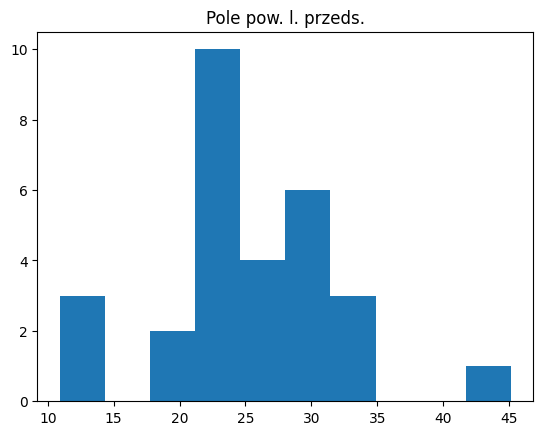

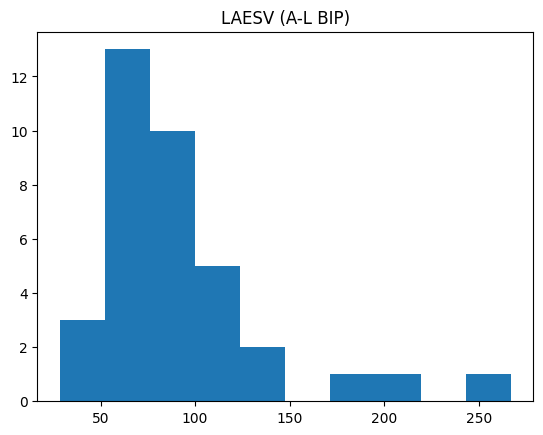

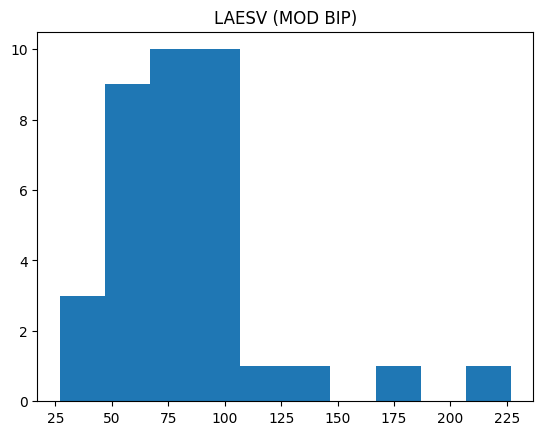

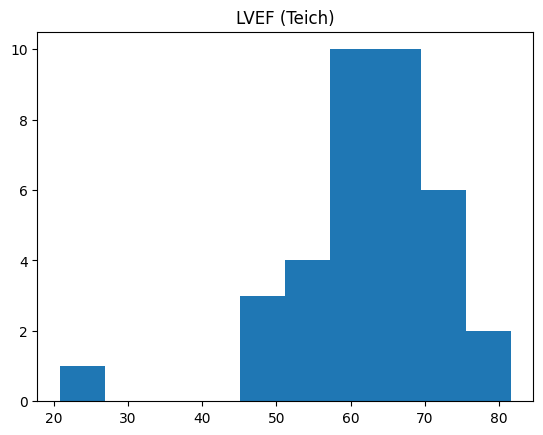

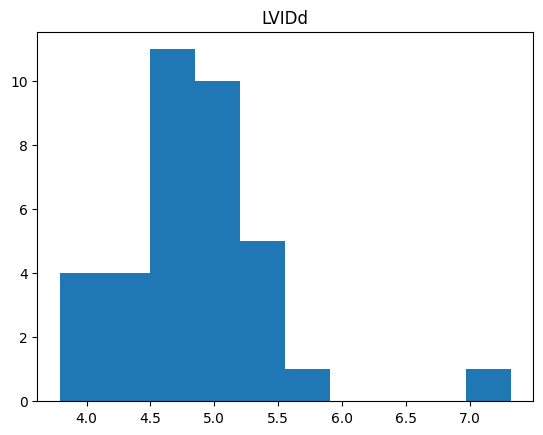

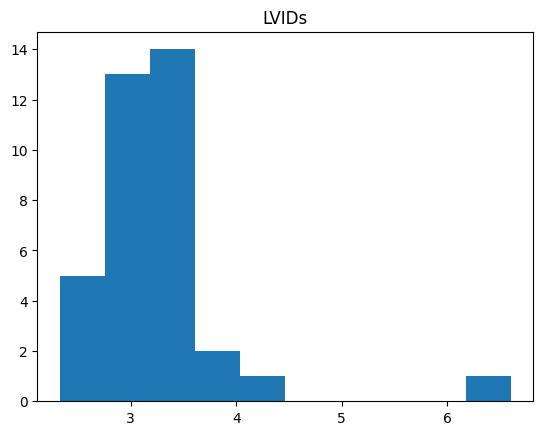

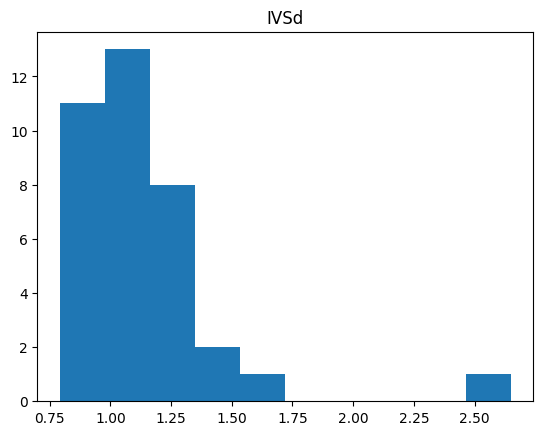

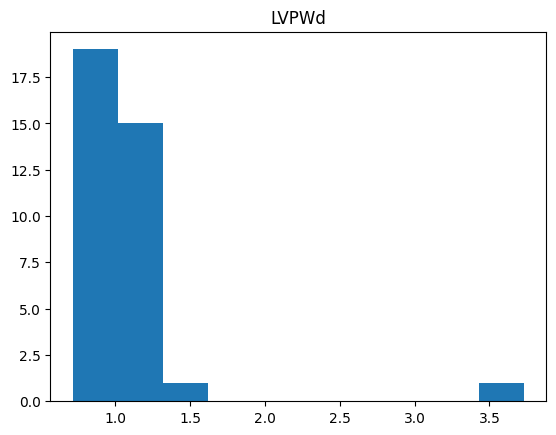

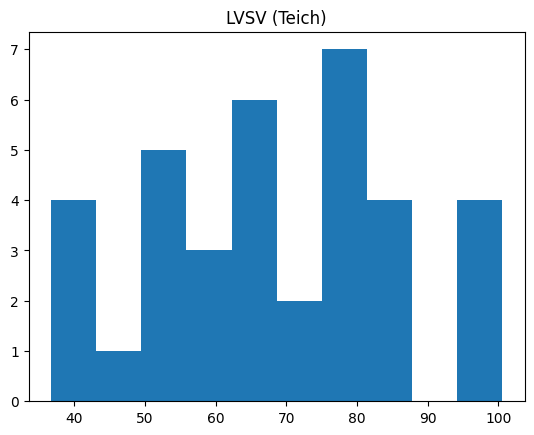

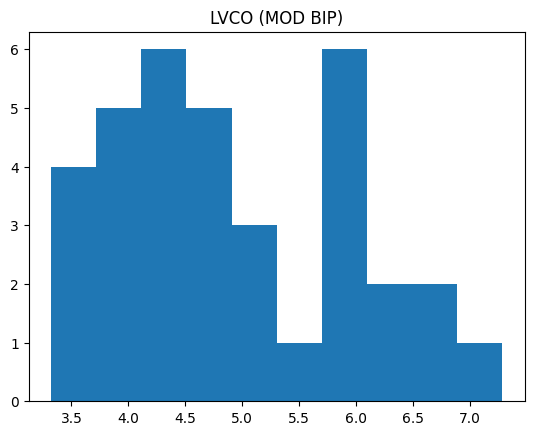

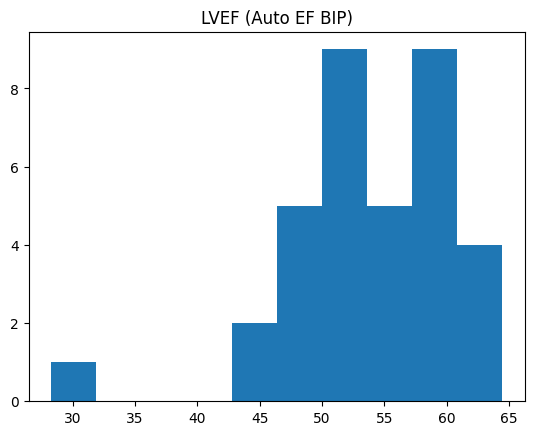

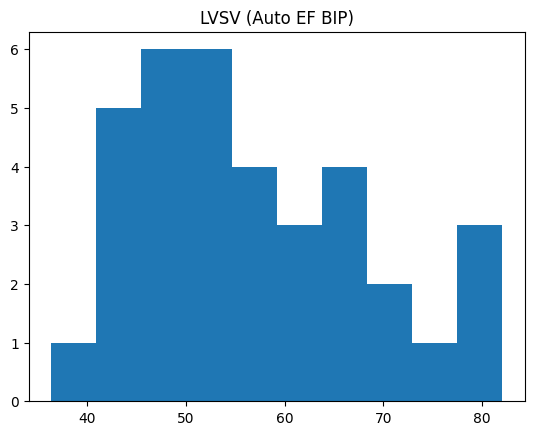

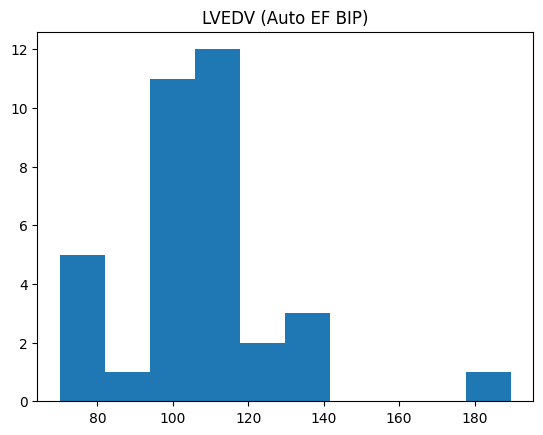

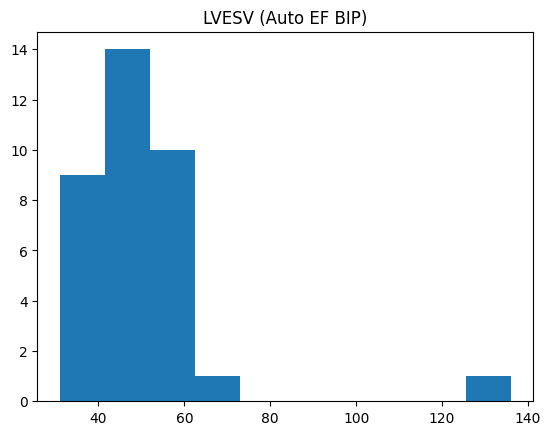

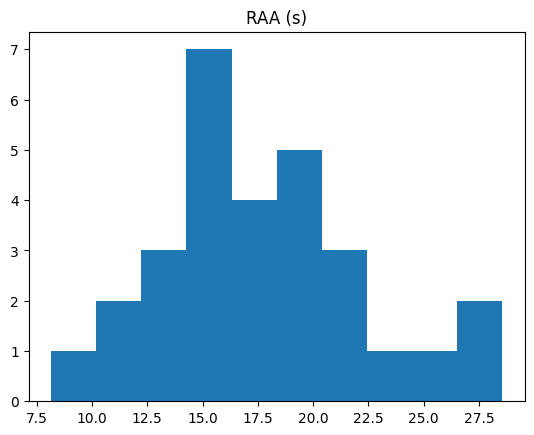

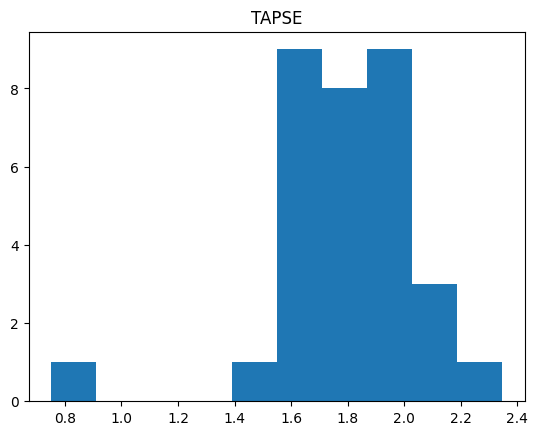

In [9]:
for value in bez_odstajacych:
    values = df[f'{value}'].dropna().tolist()
    plt.figure()
    plt.hist(values)
    plt.title(f'{value}')
    plt.show

In [10]:
new_df = df.filter(bez_odstajacych, axis=1)

for value in bez_odstajacych:
    new_df[value] = new_df[value].dropna()

print(new_df)

   Pole pow. l. przeds. LAESV (A-L BIP) LAESV (MOD BIP) LVEF (Teich)  \
0             18.765409       48.012516       44.913516    68.164141   
1             26.148517        62.94594       60.401573    74.053208   
2             21.371938       73.051742       67.844143    58.595315   
3                   NaN       75.167018       70.979147    70.574433   
4                 26.59           78.46           74.39        60.98   
5                 28.46           97.46           93.64        61.45   
6                   NaN       98.872708       94.060183     63.78406   
7             27.409278       89.838876       85.129573    72.445459   
8             11.270701       95.665425       91.162969    45.383362   
9              29.44406       107.06531      100.021018    66.237822   
10            29.229134       83.858002       79.145083    69.591778   
11                22.48           66.52           60.38        56.47   
12            17.967313       53.357463       47.814695    68.21

In [11]:
scaled_file = os.path.join(folder_path, 'output', 'skalowane_dane.xlsx')
with pd.ExcelWriter(scaled_file, engine='openpyxl') as writer:
    new_df[bez_odstajacych].to_excel(writer, index=True, sheet_name='out')

In [12]:
data = pd.read_excel(scaled_file)
data

,Unnamed: 0,Pole pow. l. przeds.,LAESV (A-L BIP),LAESV (MOD BIP),LVEF (Teich),LVIDd,LVIDs,IVSd,LVPWd,LVSV (Teich),LVCO (MOD BIP),LVEF (Auto EF BIP),LVSV (Auto EF BIP),LVEDV (Auto EF BIP),LVESV (Auto EF BIP),RAA (s),TAPSE
0,0,18.765409,48.012516,44.913516,68.164141,4.210358,2.623529,0.820337,0.968417,53.874855,4.131842,46.974083,44.359459,94.433899,50.074440,14.988046,1.680000
1,1,26.148517,62.945940,60.401573,74.053208,4.931843,2.806366,0.908217,0.781091,84.811850,4.330988,59.624493,62.209763,104.335915,42.126152,18.163537,1.836522
2,2,21.371938,73.051742,67.844143,58.595315,4.513216,3.120894,2.649397,0.976275,54.543016,4.295102,58.864735,59.159138,100.500130,41.340992,19.186148,NaN
3,3,NaN,75.167018,70.979147,70.574433,4.845587,2.904829,1.271071,1.106639,77.573079,4.236117,56.433899,63.910892,113.249123,49.338230,NaN,1.893913
4,4,26.590000,78.460000,74.390000,60.980000,4.830000,3.250000,0.940000,0.780000,66.570000,3.340000,50.200000,41.000000,81.680000,40.680000,18.040000,1.880000
5,5,28.460000,97.460000,93.640000,61.450000,4.840000,3.240000,1.010000,0.910000,67.380000,4.520000,59.420000,57.480000,96.740000,39.260000,NaN,1.690000
6,6,NaN,98.872708,94.060183,63.784060,5.537552,3.594514,1.109307,1.082329,95.516187,NaN,NaN,NaN,NaN,NaN,NaN,1.690435
7,7,27.409278,89.838876,85.129573,72.445459,5.009082,2.918536,1.082329,0.718245,86.023906,5.761123,60.254398,70.375061,116.796547,46.421490,18.169197,1.940870
8,8,11.270701,95.665425,91.162969,45.383362,4.981420,3.852762,1.027461,1.145551,53.200334,5.761061,50.125560,53.323810,106.380500,53.056670,13.777353,0.751304
9,9,29.444060,107.065310,100.021018,66.237822,4.429392,2.820011,1.000355,1.055712,59.000338,4.973712,47.155689,47.347828,100.407455,53.059628,28.540532,1.460870


In [13]:
cor_pearson = data[bez_odstajacych].corr(method='pearson')
pearson = os.path.join(folder_path, 'output', 'korelacje.xlsx')
with pd.ExcelWriter(pearson, engine='openpyxl') as writer:
    cor_pearson.to_excel(writer, index=True, sheet_name='pearson')


In [14]:
filename = r"C:\\Users\\jmmbo\\Downloads\\pacjenci\\output\\korelacje.xlsx"
cor_kendall = data[bez_odstajacych].corr(method='kendall')
with pd.ExcelWriter(filename, engine='openpyxl', mode='a') as writer:
    cor_kendall.to_excel(writer, sheet_name='kendall', index=True)

In [15]:
cor_spearman = data[bez_odstajacych].corr(method='spearman')
with pd.ExcelWriter(filename, engine='openpyxl', mode='a') as writer:
    cor_spearman.to_excel(writer, sheet_name="spearman", index=True)

In [16]:
korelacje = pd.read_excel(filename)

for row in bez_odstajacych:
    for index, value in enumerate(korelacje[row]):
        if -0.5 < korelacje[row][index] <= 0.5:
            korelacje[row][index] = np.nan
        else:
            pass

In [17]:
skorelowane = []
for column in korelacje.columns:
    for index, row in enumerate(korelacje['Unnamed: 0']):
        if not (korelacje[column][index] != korelacje[column][index]) and column != row and column != 'Unnamed: 0' and (row,column) not in skorelowane and (column,row) not in skorelowane:
            skorelowane.append((column,row))

In [18]:
skalowane_dane = pd.read_excel(r"C:\Users\jmmbo\Downloads\pacjenci\output\skalowane_dane.xlsx")

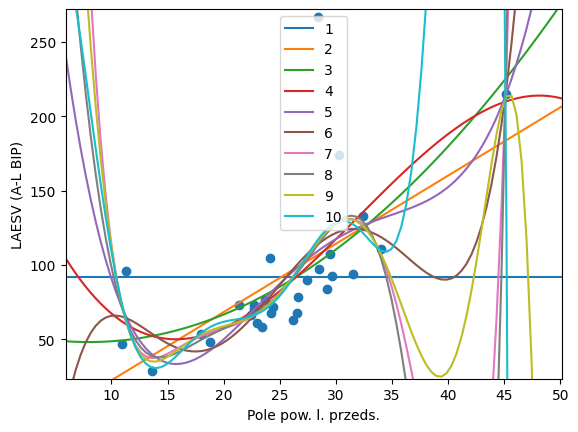

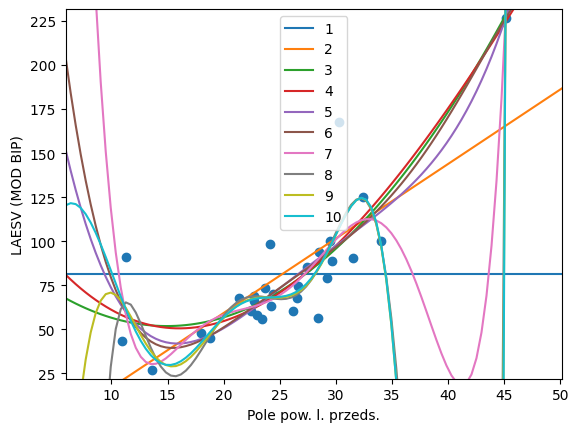

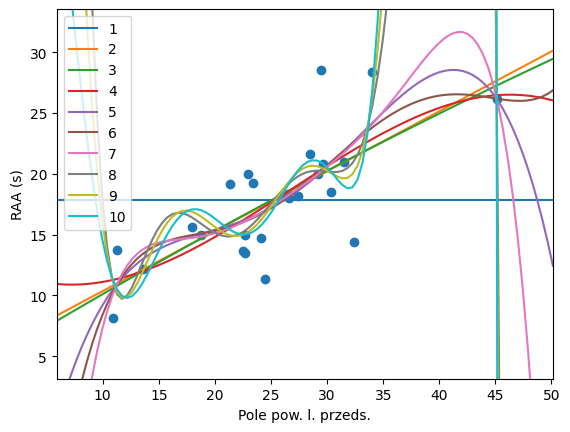

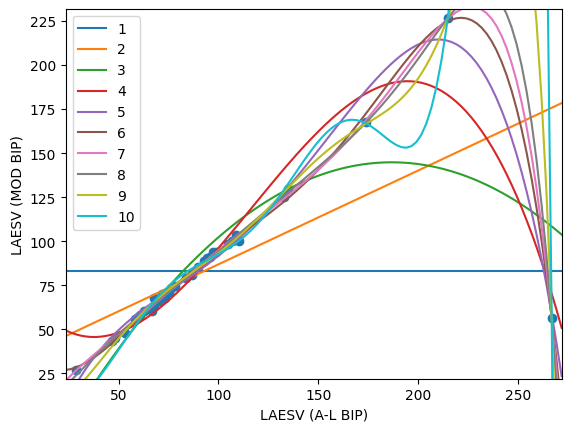

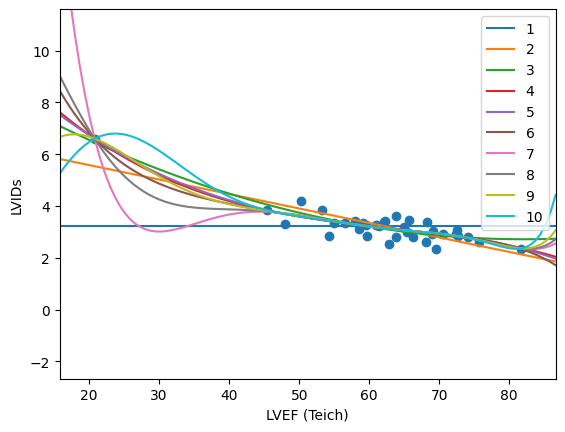

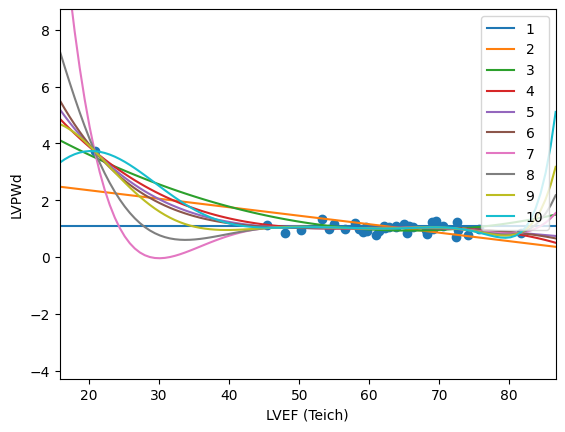

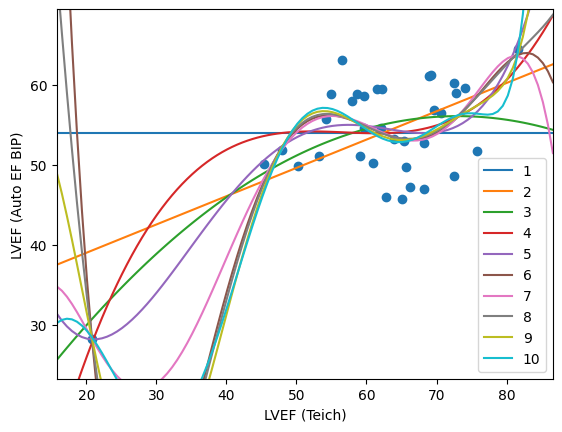

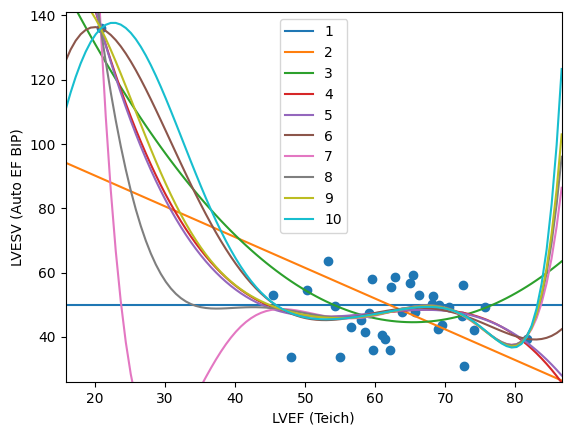

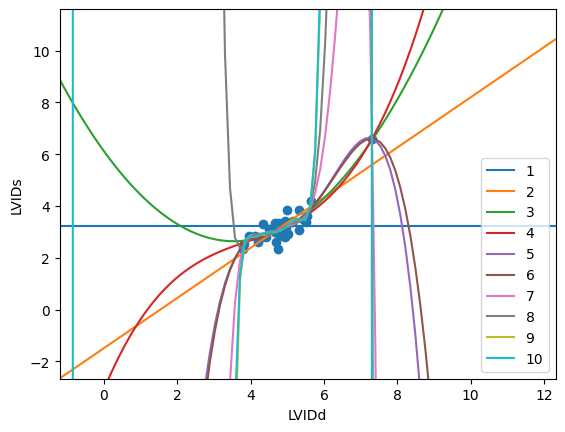

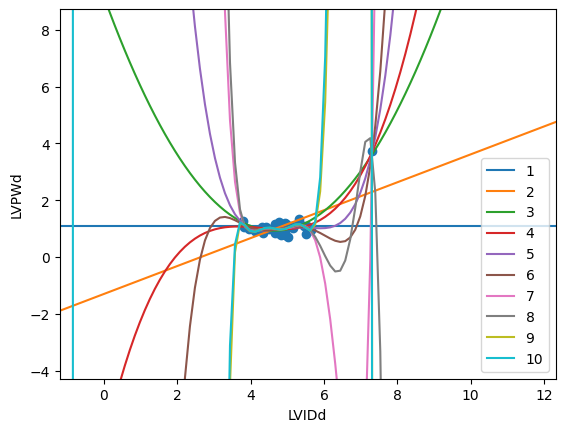

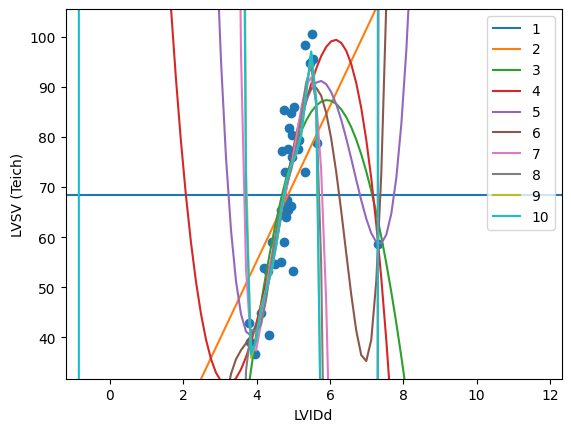

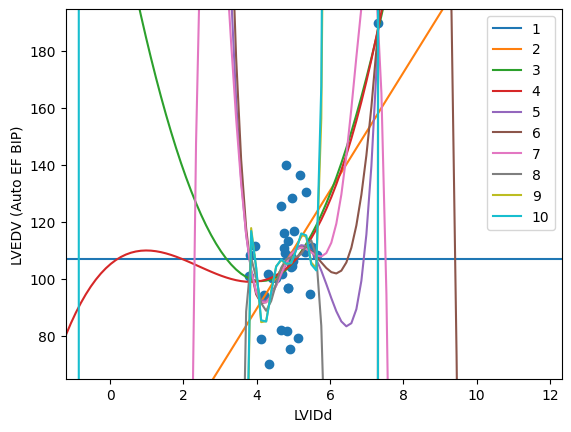

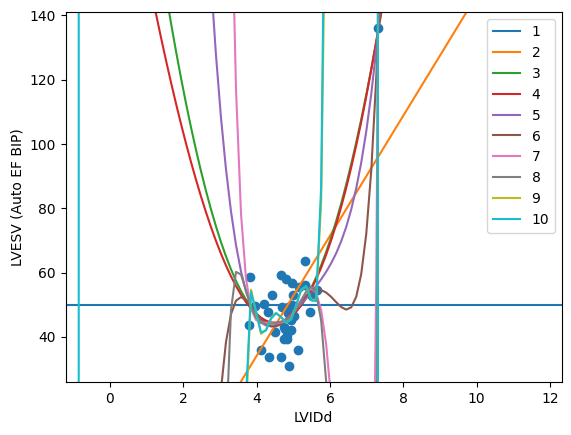

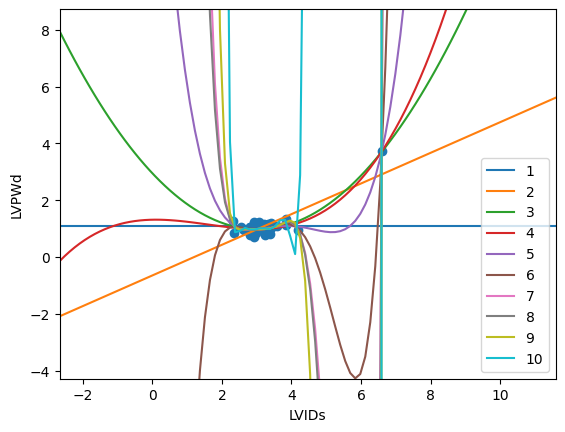

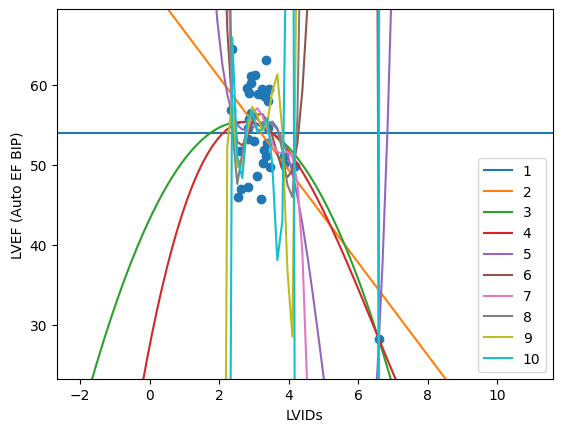

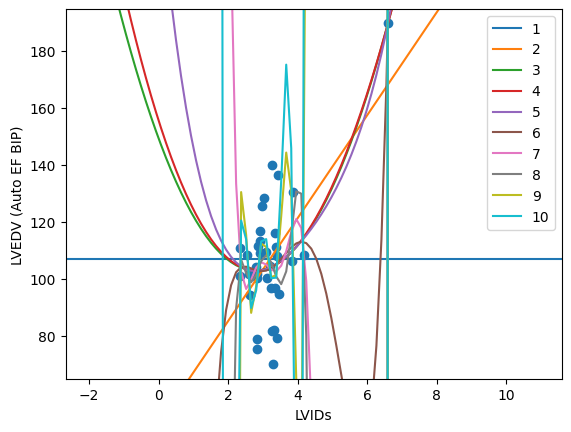

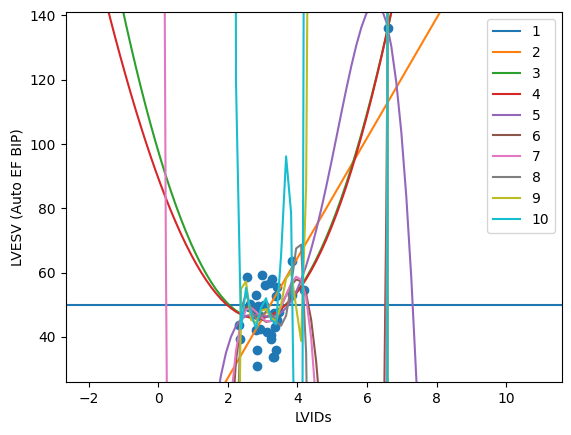

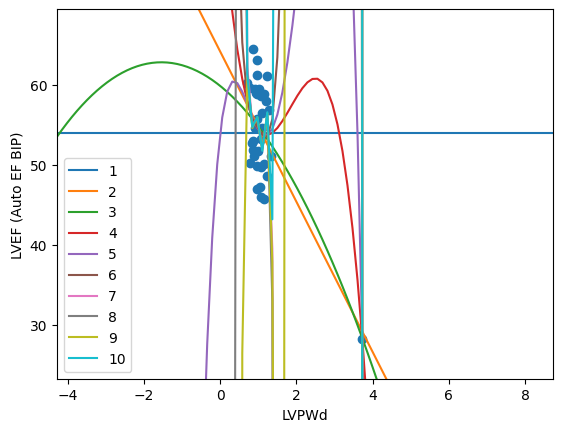

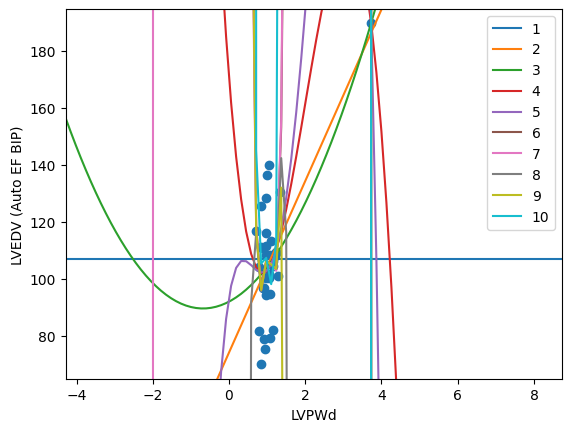

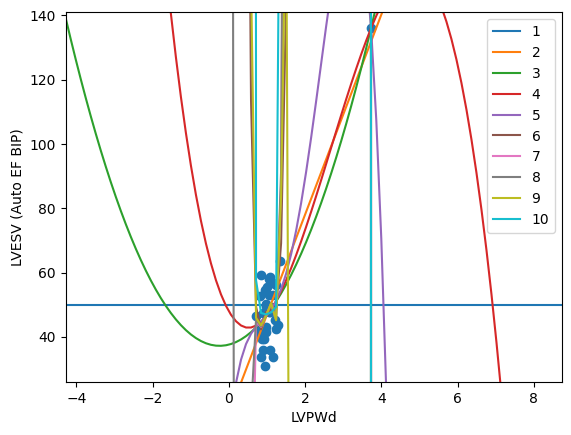

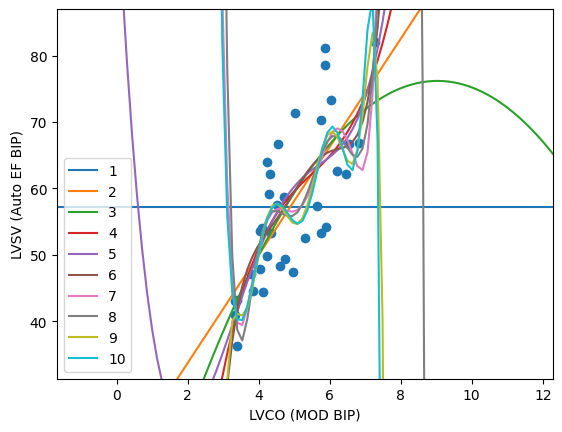

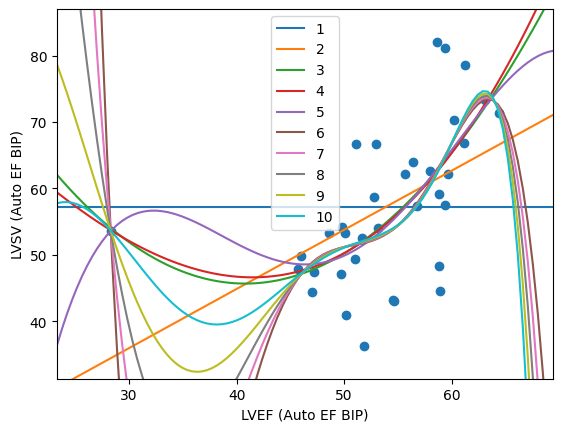

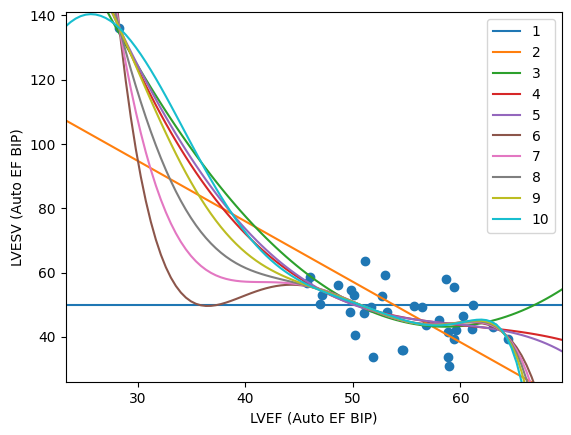

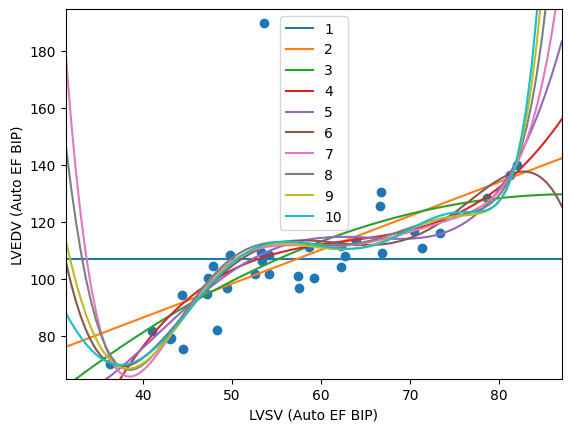

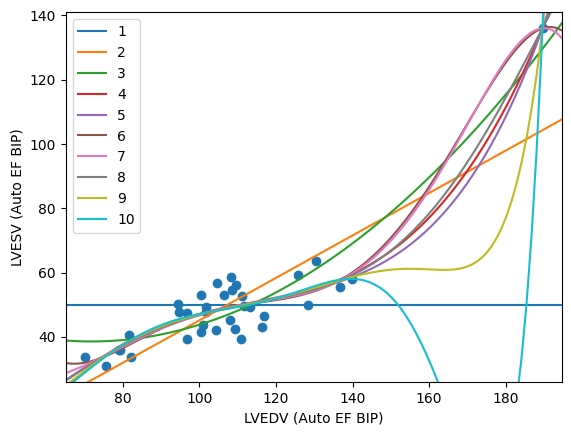

In [19]:
wartosci_do_plotowania = []

for krotka in skorelowane:
    x, y = krotka

    x = skalowane_dane[x]
    y = skalowane_dane[y]

    z = pd.DataFrame(zip(x,y)).dropna()
    wartosci_do_plotowania.append(z)


for index, krotka in enumerate(skorelowane):
            wart_reshaped = np.array(wartosci_do_plotowania[index][0]).reshape(-1,1)
            features = PolynomialFeatures(degree=len(wartosci_do_plotowania[index][0]))
            WART = features.fit_transform(wart_reshaped)

            data_points = 100
            generated_base_x = np.linspace(min(wartosci_do_plotowania[index][0])-5,max(wartosci_do_plotowania[index][0])+5,data_points)
            generated_base_y = np.sin(2*np.pi* generated_base_x)

            x_to_fit = generated_base_x
            x_to_fit_reshaped = x_to_fit.reshape(-1,1)
            x_fitting = features.fit_transform(x_to_fit_reshaped)


            linreg = LinearRegression(fit_intercept=False)

            for polynomial_order in range(1,11):
                fitting_values = linreg.fit(WART[:, :polynomial_order], wartosci_do_plotowania[index][1])
                fitted_values_to_model = fitting_values.predict(x_fitting[:,:polynomial_order])
                plt.plot(x_to_fit, fitted_values_to_model, label=str(polynomial_order))

            plt.scatter(wartosci_do_plotowania[index][0], wartosci_do_plotowania[index][1])
            plt.xlabel(krotka[0])
            plt.ylabel(krotka[1])
            plt.xlim(min(wartosci_do_plotowania[index][0])-5, max(wartosci_do_plotowania[index][0])+5)
            plt.ylim(min(wartosci_do_plotowania[index][1])-5, max(wartosci_do_plotowania[index][1])+5)
            plt.legend()
            plt.show()

In [20]:
wartosci_do_plotowania = []

for krotka in skorelowane:
    x, y = krotka

    x = skalowane_dane[x]
    y = skalowane_dane[y]

    z = pd.DataFrame(zip(x,y), columns=['x', 'y']).dropna()
    wartosci_do_plotowania.append(z)


Order: 1 | RMSE = 62.718282345366134
Order: 2 | RMSE = 91.58228102545151
Order: 3 | RMSE = 126.71943359558631
Order: 4 | RMSE = 382.8234424156612
Order: 5 | RMSE = 1117.7330057107706
Order: 6 | RMSE = 1238.0046723857715
Order: 7 | RMSE = 30460.504647227404
Order: 8 | RMSE = 44432.76963921475
Order: 9 | RMSE = 58254.528176294705
Order: 10 | RMSE = 66210.12942080558


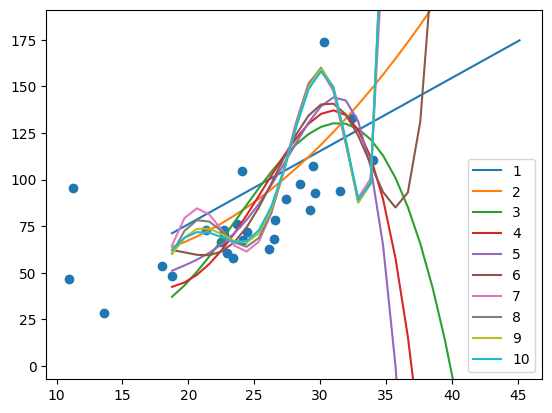

Order: 1 | RMSE = 44.78112939097338
Order: 2 | RMSE = 74.75165470781168
Order: 3 | RMSE = 48.027786604952524
Order: 4 | RMSE = 68.43298676711544
Order: 5 | RMSE = 1155.9061982034239
Order: 6 | RMSE = 2967.566164769469
Order: 7 | RMSE = 10858.414777392414
Order: 8 | RMSE = 17703.732646738285
Order: 9 | RMSE = 28101.002463645033
Order: 10 | RMSE = 43951.439687129794


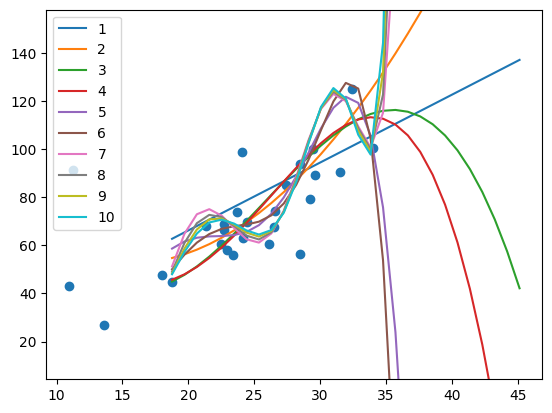

Order: 1 | RMSE = 5.420558708761657
Order: 2 | RMSE = 5.4328581520567685
Order: 3 | RMSE = 5.589066647338945
Order: 4 | RMSE = 5.489076744517181
Order: 5 | RMSE = 5.485809759957915
Order: 6 | RMSE = 5.686823241069357
Order: 7 | RMSE = 5.566622402220751
Order: 8 | RMSE = 6.508889261891339
Order: 9 | RMSE = 6.555535412204076
Order: 10 | RMSE = 6.173170038533672


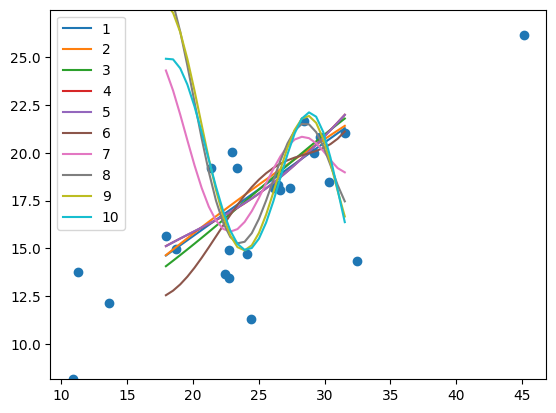

Order: 1 | RMSE = 35.43134511410785
Order: 2 | RMSE = 42.50002250958665
Order: 3 | RMSE = 42.11807464989071
Order: 4 | RMSE = 37.363476318088004
Order: 5 | RMSE = 38.33372084170114
Order: 6 | RMSE = 38.635469891758696
Order: 7 | RMSE = 38.629645680446615
Order: 8 | RMSE = 38.559967605150845
Order: 9 | RMSE = 39.48596188984501
Order: 10 | RMSE = 39.94849064514498


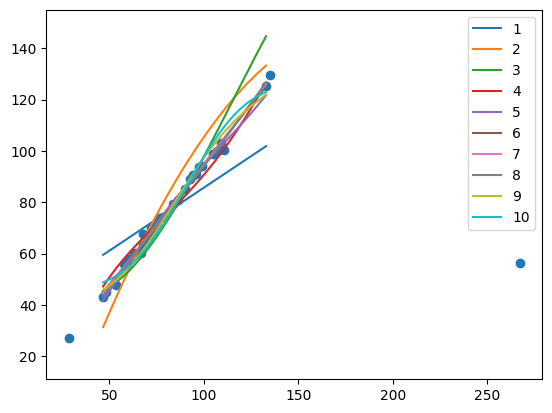

Order: 1 | RMSE = 1.010751492988678
Order: 2 | RMSE = 0.908528880732134
Order: 3 | RMSE = 0.8763666405779204
Order: 4 | RMSE = 0.9231014309295745
Order: 5 | RMSE = 1.0927378345139807
Order: 6 | RMSE = 1.6167436799668606
Order: 7 | RMSE = 1.507045129636033
Order: 8 | RMSE = 1.4082801676605663
Order: 9 | RMSE = 1.3179428925273478
Order: 10 | RMSE = 1.2364838179043438


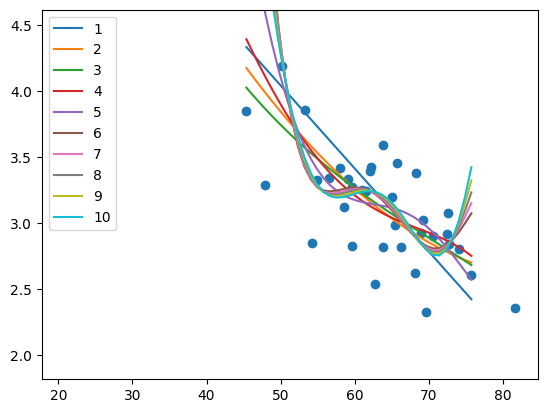

Order: 1 | RMSE = 0.665683394140547
Order: 2 | RMSE = 0.5348631335981943
Order: 3 | RMSE = 0.4932281348723101
Order: 4 | RMSE = 0.4920071339346639
Order: 5 | RMSE = 0.4944195475202931
Order: 6 | RMSE = 0.609111924664751
Order: 7 | RMSE = 0.5763256991707211
Order: 8 | RMSE = 0.556686485007522
Order: 9 | RMSE = 0.5467575766251062
Order: 10 | RMSE = 0.5438022196268809


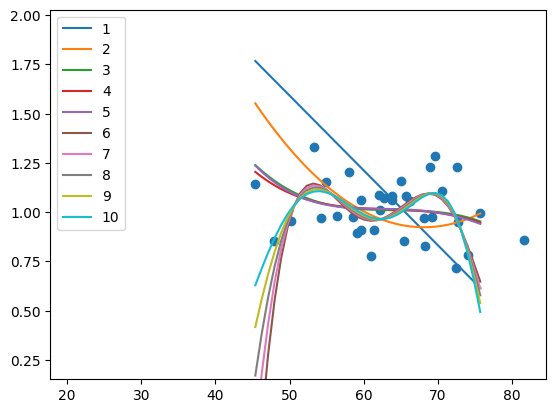

Order: 1 | RMSE = 7.315832663045532
Order: 2 | RMSE = 7.144452421941476
Order: 3 | RMSE = 6.884093494658693
Order: 4 | RMSE = 6.810682034636545
Order: 5 | RMSE = 6.792461131469031
Order: 6 | RMSE = 6.734865488479167
Order: 7 | RMSE = 6.747012265005002
Order: 8 | RMSE = 6.763076971242319
Order: 9 | RMSE = 6.781294480054701
Order: 10 | RMSE = 6.8003210098578535


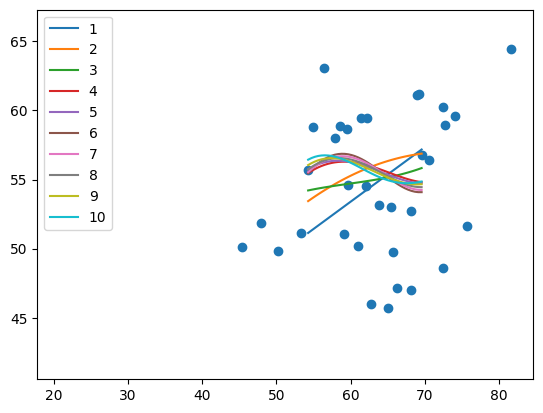

Order: 1 | RMSE = 18.632377976756594
Order: 2 | RMSE = 17.765631675805142
Order: 3 | RMSE = 16.916519417048676
Order: 4 | RMSE = 16.916064392335286
Order: 5 | RMSE = 16.942430042320325
Order: 6 | RMSE = 16.7690763495498
Order: 7 | RMSE = 16.753371514065076
Order: 8 | RMSE = 16.747169337413535
Order: 9 | RMSE = 16.748885589540222
Order: 10 | RMSE = 16.756262760530817


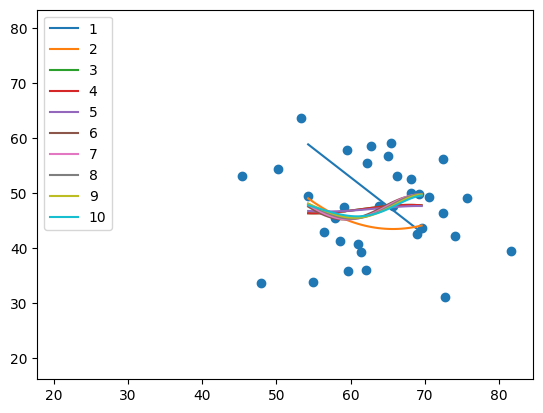

Order: 1 | RMSE = 0.7333230914045119
Order: 2 | RMSE = 0.7031617148124261
Order: 3 | RMSE = 0.7006362829255678
Order: 4 | RMSE = 0.675403507489678
Order: 5 | RMSE = 0.6754921449373635
Order: 6 | RMSE = 0.6788162343294823
Order: 7 | RMSE = 0.6805506938611512
Order: 8 | RMSE = 0.6963972027803569
Order: 9 | RMSE = 0.6976056131552253
Order: 10 | RMSE = 0.6982891268462788


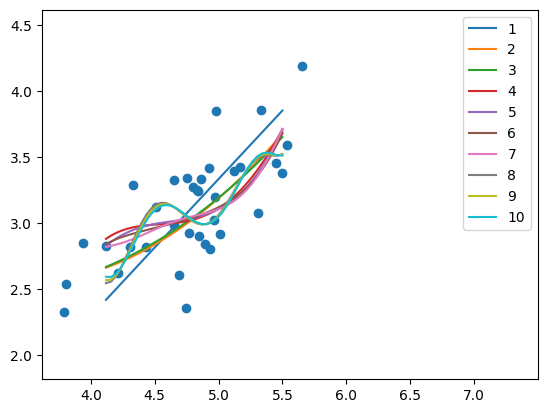

Order: 1 | RMSE = 0.45735203062370733
Order: 2 | RMSE = 0.462502509861579
Order: 3 | RMSE = 0.46777636166128783
Order: 4 | RMSE = 0.4695974918650086
Order: 5 | RMSE = 0.4689148314035393
Order: 6 | RMSE = 0.4568446388033763
Order: 7 | RMSE = 0.4559697002899467
Order: 8 | RMSE = 0.46027663432576393
Order: 9 | RMSE = 0.460805216416024
Order: 10 | RMSE = 0.4613065037210674


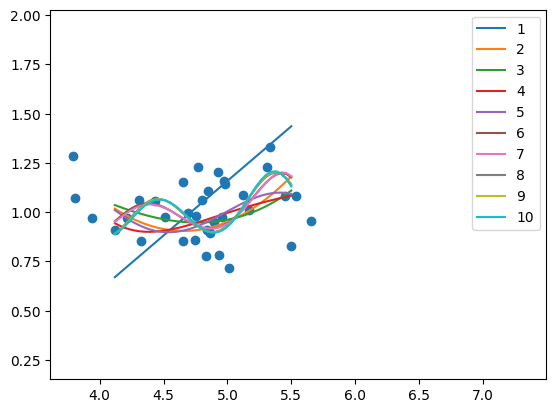

Order: 1 | RMSE = 17.881473740025232
Order: 2 | RMSE = 20.677545008470663
Order: 3 | RMSE = 21.630584711937836
Order: 4 | RMSE = 23.50066249970503
Order: 5 | RMSE = 23.493255950911294
Order: 6 | RMSE = 23.397754958709037
Order: 7 | RMSE = 23.369281827702224
Order: 8 | RMSE = 22.823732071999803
Order: 9 | RMSE = 22.713164910205077
Order: 10 | RMSE = 22.64260086772132


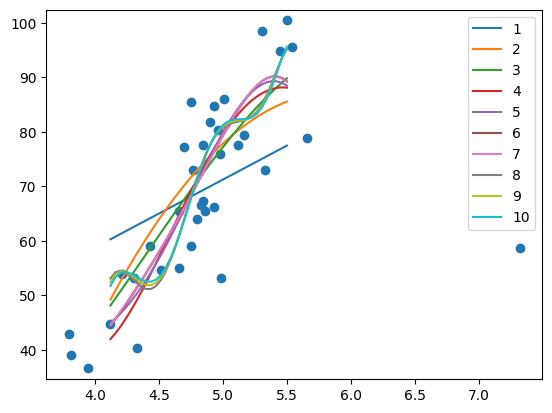

Order: 1 | RMSE = 25.539150695866272
Order: 2 | RMSE = 22.439437472114665
Order: 3 | RMSE = 25.963517572245863
Order: 4 | RMSE = 23.680958547836855
Order: 5 | RMSE = 45.50369844345514
Order: 6 | RMSE = 104.82551972579827
Order: 7 | RMSE = 523.184718254368
Order: 8 | RMSE = 344.1420053800916
Order: 9 | RMSE = 390.41645719371354
Order: 10 | RMSE = 412.2611119144804


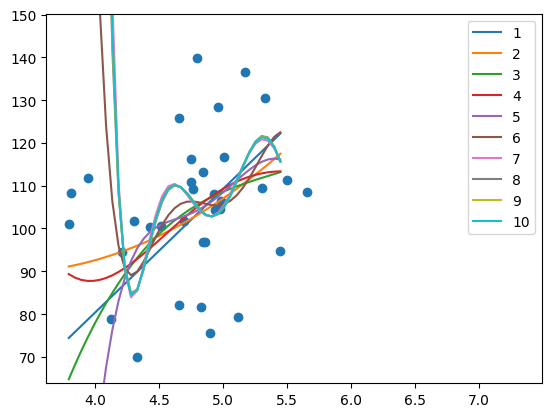

Order: 1 | RMSE = 20.895622695370797
Order: 2 | RMSE = 16.50313461538639
Order: 3 | RMSE = 16.541409445357584
Order: 4 | RMSE = 19.260355489707127
Order: 5 | RMSE = 20.228801507722803
Order: 6 | RMSE = 83.90692343644574
Order: 7 | RMSE = 322.82024544446256
Order: 8 | RMSE = 37.20735983826162
Order: 9 | RMSE = 48.83893242513358
Order: 10 | RMSE = 82.56562019537611


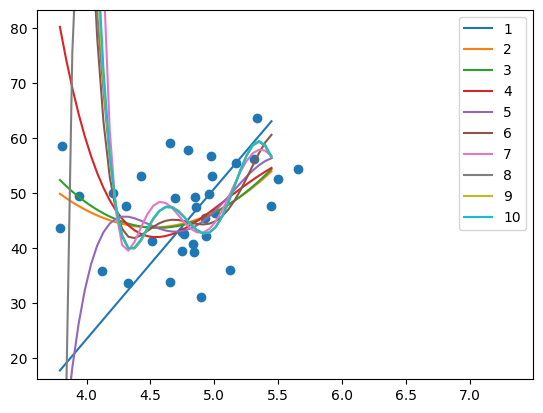

Order: 1 | RMSE = 0.45387718376549163
Order: 2 | RMSE = 0.4630386252727287
Order: 3 | RMSE = 0.46569250177076793
Order: 4 | RMSE = 0.4612390063089161
Order: 5 | RMSE = 0.45464046447348927
Order: 6 | RMSE = 0.44655599591335343
Order: 7 | RMSE = 0.44329904050741625
Order: 8 | RMSE = 0.4432109573471288
Order: 9 | RMSE = 0.44372525525782797
Order: 10 | RMSE = 0.4431077905815426


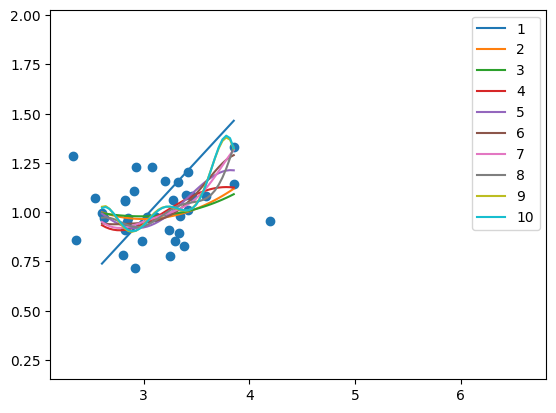

Order: 1 | RMSE = 7.228976418843052
Order: 2 | RMSE = 6.906680688675428
Order: 3 | RMSE = 6.900727419068275
Order: 4 | RMSE = 7.216224132184848
Order: 5 | RMSE = 7.577386319071277
Order: 6 | RMSE = 7.767537812617799
Order: 7 | RMSE = 8.901195972286345
Order: 8 | RMSE = 8.808509091148037
Order: 9 | RMSE = 7.675965588292803
Order: 10 | RMSE = 7.598626462818804


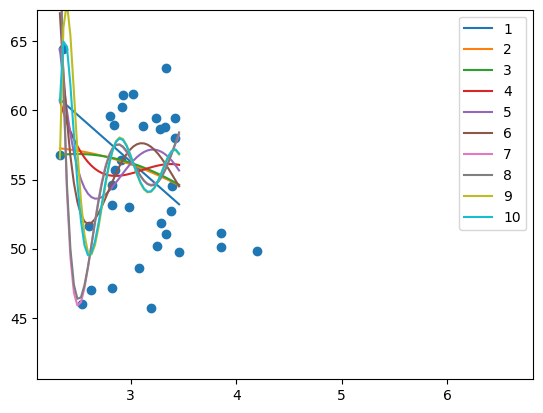

Order: 1 | RMSE = 22.40609131533448
Order: 2 | RMSE = 21.650020848810886
Order: 3 | RMSE = 21.679528154483304
Order: 4 | RMSE = 21.74595002655851
Order: 5 | RMSE = 21.557821539318642
Order: 6 | RMSE = 22.8421468130457
Order: 7 | RMSE = 23.015221267703474
Order: 8 | RMSE = 42.70915233264014
Order: 9 | RMSE = 42.72256850551925
Order: 10 | RMSE = 44.02711092335284


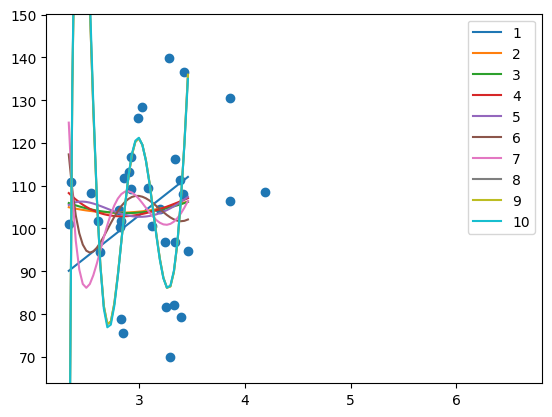

Order: 1 | RMSE = 18.175060099819756
Order: 2 | RMSE = 17.072097527130264
Order: 3 | RMSE = 17.068444666728457
Order: 4 | RMSE = 17.182444894888345
Order: 5 | RMSE = 17.239943112767016
Order: 6 | RMSE = 17.381226898614003
Order: 7 | RMSE = 17.636110743535887
Order: 8 | RMSE = 26.190733078524108
Order: 9 | RMSE = 21.92661843914944
Order: 10 | RMSE = 23.293470229507122


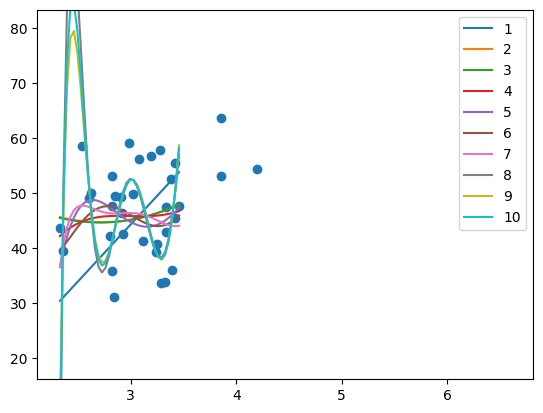

Order: 1 | RMSE = 6.523023939602614
Order: 2 | RMSE = 6.536344066458477
Order: 3 | RMSE = 6.480425510751694
Order: 4 | RMSE = 6.45974984968725
Order: 5 | RMSE = 6.464959280824534
Order: 6 | RMSE = 6.557524282845669
Order: 7 | RMSE = 6.47708689868785
Order: 8 | RMSE = 6.507711841491328
Order: 9 | RMSE = 6.715647302019903
Order: 10 | RMSE = 17.91484568756863


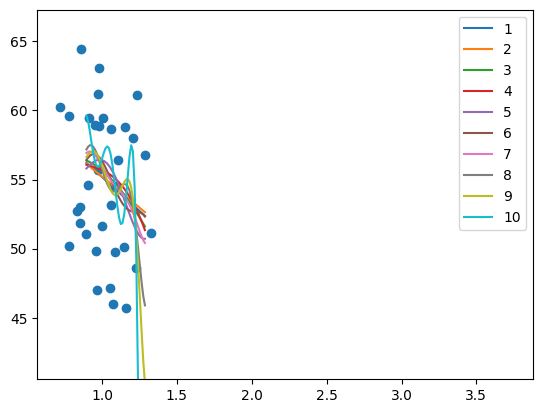

Order: 1 | RMSE = 21.439302712381952
Order: 2 | RMSE = 21.38285929304822
Order: 3 | RMSE = 21.401648805808282
Order: 4 | RMSE = 21.280794833598062
Order: 5 | RMSE = 20.674776508924953
Order: 6 | RMSE = 20.711244125783132
Order: 7 | RMSE = 20.731457077144643
Order: 8 | RMSE = 20.39571630514423
Order: 9 | RMSE = 34.94665352485112
Order: 10 | RMSE = 24.210673172653184


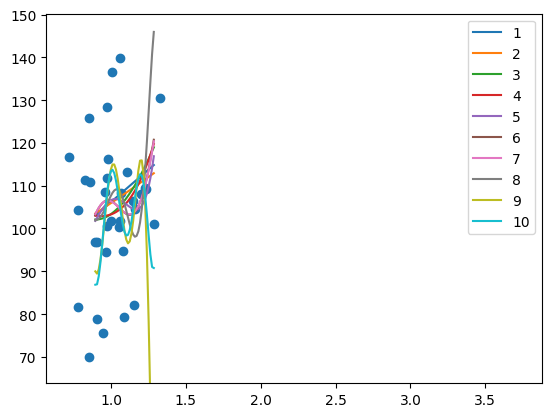

Order: 1 | RMSE = 16.288304305401383
Order: 2 | RMSE = 16.3479166851177
Order: 3 | RMSE = 16.131650287073576
Order: 4 | RMSE = 16.02071648955581
Order: 5 | RMSE = 15.980782134546153
Order: 6 | RMSE = 15.970583184263115
Order: 7 | RMSE = 15.861432968779221
Order: 8 | RMSE = 15.211655737063744
Order: 9 | RMSE = 19.507984265081248
Order: 10 | RMSE = 19.148608667526027


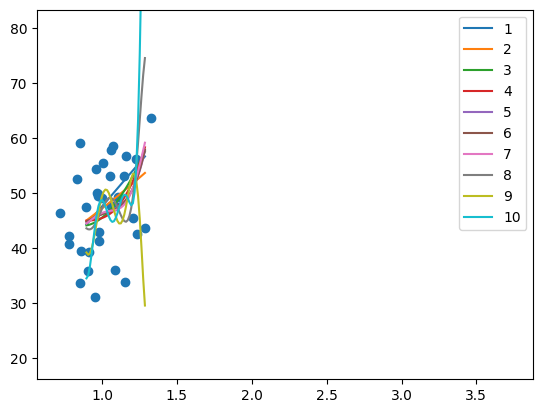

Order: 1 | RMSE = 16.97115772333037
Order: 2 | RMSE = 14.211009788161205
Order: 3 | RMSE = 14.590424973866003
Order: 4 | RMSE = 14.864494440642176
Order: 5 | RMSE = 33.536091275324935
Order: 6 | RMSE = 16.49960867031199
Order: 7 | RMSE = 194.2751824238965
Order: 8 | RMSE = 910.9191193111487
Order: 9 | RMSE = 3054.879784531449
Order: 10 | RMSE = 3578.8353497662124


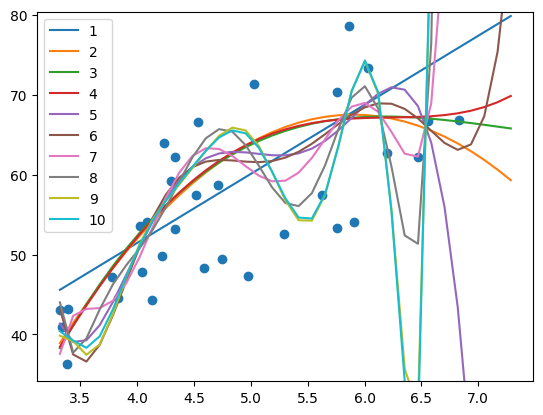

Order: 1 | RMSE = 12.41039739743822
Order: 2 | RMSE = 13.746837096502306
Order: 3 | RMSE = 13.73548971709681
Order: 4 | RMSE = 13.732507137712798
Order: 5 | RMSE = 14.246269860441812
Order: 6 | RMSE = 13.820056056855773
Order: 7 | RMSE = 13.836613910590932
Order: 8 | RMSE = 13.86488686911457
Order: 9 | RMSE = 13.882085604623887
Order: 10 | RMSE = 13.897240887522848


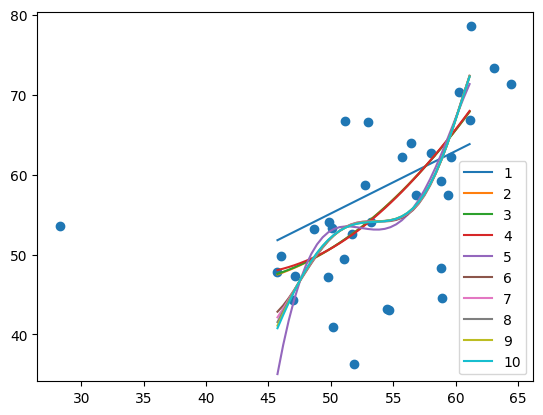

Order: 1 | RMSE = 21.69826080861143
Order: 2 | RMSE = 18.66547979691627
Order: 3 | RMSE = 18.13980396114671
Order: 4 | RMSE = 18.089497798483023
Order: 5 | RMSE = 17.640391960307387
Order: 6 | RMSE = 17.618380994158315
Order: 7 | RMSE = 17.6160282929211
Order: 8 | RMSE = 17.617712564394335
Order: 9 | RMSE = 17.61762460016992
Order: 10 | RMSE = 17.61684939531975


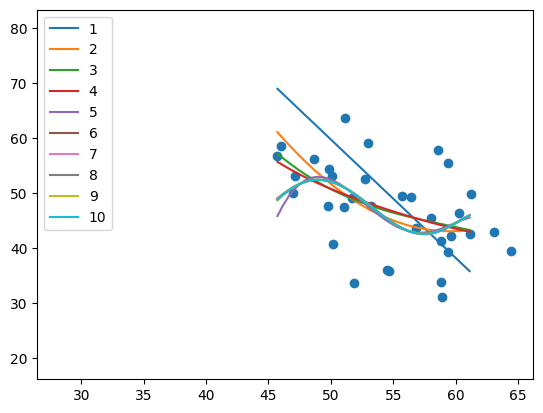

Order: 1 | RMSE = 24.609830381996645
Order: 2 | RMSE = 24.090240665560398
Order: 3 | RMSE = 22.780454980931772
Order: 4 | RMSE = 22.30840133732521
Order: 5 | RMSE = 23.109275222182124
Order: 6 | RMSE = 23.12659332594619
Order: 7 | RMSE = 23.271014589105636
Order: 8 | RMSE = 23.354495380415706
Order: 9 | RMSE = 23.433963775763694
Order: 10 | RMSE = 23.482095504868735


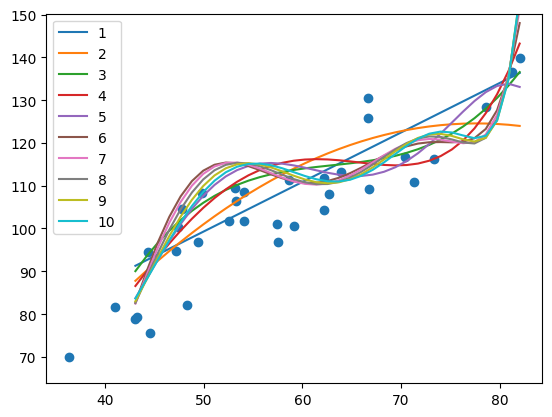

Order: 1 | RMSE = 18.52324971920709
Order: 2 | RMSE = 16.72102187083445
Order: 3 | RMSE = 16.25793636293644
Order: 4 | RMSE = 16.29698578311353
Order: 5 | RMSE = 16.228879959666877
Order: 6 | RMSE = 16.272610913360527
Order: 7 | RMSE = 16.331457205204227
Order: 8 | RMSE = 16.40989698400159
Order: 9 | RMSE = 16.51036596622688
Order: 10 | RMSE = 16.632895240578648


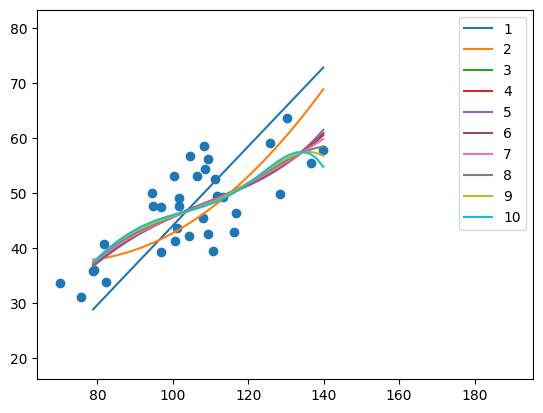

In [32]:
for z in wartosci_do_plotowania:
    x, y = z['x'], z['y'] #wczytujemy wartosci x i y


    plt.scatter(x,y) # wyswietlamy punkty na wykresie


    for polynomial_order in range(1, 11):
        poly = PolynomialFeatures(degree=polynomial_order, include_bias=False) #tworzymy model wielomianu o danym stopniu
        poly_features = poly.fit_transform(np.array(x).reshape(-1,1)) #fitujemy i transformujemy argumenty(x) do modelu

        x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42) #dzielimy nasze dane na zestaw treningowy i testowy w stosunku 70:30

        data_points = len(x) #liczba punktow do generowania sinusoidy, musi byc rowna ilosci naszych argumentow aby mozna bylo policzyc RMSE
        generated_base_x_test = np.linspace(min(pd.DataFrame(x_test)[0]),max(pd.DataFrame(x_test)[0]),data_points) #zbior argumentow(x) do sinusoidy
        generated_base_y_test = np.sin(2*np.pi* generated_base_x_test) #wygenerowana sinusoida ktora bedziemy fitowac do naszych danych treningowych

        poly_features_sin = poly.fit_transform(generated_base_x_test.reshape(-1,1)) #fitujemy i transformujemy argumenty(x) do modelu

        polynomial_regression_model = LinearRegression() #tworzymy model regresji
        polynomial_regression_model.fit(x_train, y_train) #dopasowujemy model do danych treningowych

        y_predicted = polynomial_regression_model.predict(poly_features_sin) #tworzymy przewidywanego y na podstawie sinusoidy stworzonej na bazie danych testowych
        rmse = np.sqrt(mean_squared_error(y, y_predicted)) #liczymy pierwiastek z bledu sredniokwadratowego
        print(f'Order: {polynomial_order} | RMSE = {rmse}')

        plt.plot(generated_base_x_test, y_predicted, label=f'{polynomial_order}') # wyswietlamy wygenerowana odpowiedz

    plt.ylim(np.mean(y)-2*np.std(y), np.mean(y)+2*np.std(y)) #wyswietlamy 95% wynikow
    plt.legend()
    plt.show()